   **Name**             :  Kuldeep Singh Bhandari
   
   **Roll number**  : 111601009
   
**Aim**                    :  Applying multi-class classification on Human-Activity Recognition Dataset

# Problem Statement :
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, it has captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. Propose a good multi class classification method.

# Importing Libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

# Read the csv files

In [14]:
df_train = pd.read_csv('../input/X_train.txt', delim_whitespace=True, header=None)
df_test = pd.read_csv('../input/X_test.txt', delim_whitespace=True, header=None)

y = np.array(pd.read_csv('../input/y_train.txt', header=None)).ravel()
y_test = np.array(pd.read_csv('../input/y_test.txt', header=None)).ravel()

k = 5
kf = StratifiedKFold(n_splits=k, random_state=42)

df_train.shape, df_test.shape

((7352, 561), (2947, 561))

# PRE-PROCESSING :
It is a good practice to perform feature scaling and mean normalization before applying models like Logistic Regression, SVM, etc. 

In [6]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X = stdScaler.fit_transform(df_train.values)
X_test = stdScaler.transform(df_test.values)

# Visualizing Output Labels

In [ ]:
labels = ['WALKING', 'WALKING\nUP', 'WALKING\nDOWN', 'SITTING', 'STANDING', 'LAYING']
# x_labels = np.arange(len(labels))
x_labels = [i for i in range(0, 11, 2)]
display(x_labels)
freq = [0 for i in range(len(labels))]
for i in range(len(labels)) :
    freq[i] = sum(y == i+1)
    
plt.bar(x_labels, freq)
plt.xticks(x_labels, labels)
plt.xlabel("Labels")
plt.ylabel("Frequency of label")
plt.title("Output Visualization")

plt.show()

#  Should PCA be used?
Since, the dataset contains 10299 instances and 561 attributes. The number of attributes is quite high so it might take time to train the model. Also, large number of attributes can lead to Overfitting. If the model overfits because of large number of attributes, we can use Principal Component Analysis (PCA) to reduce the number of attributes so that the model will contain new useful features. On applying PCA in the given dataset with variance 0.9, we observe that around only 63 principal components are required and with variance 0.85, around only 40 principal components are required. But when i trained my model on Logistic, SVM and Random Forest, i observed that the Training Score and Validation Score is not improving, rather it is decreasing. This may be happening because when we are applying PCA with variance 0.85, we may be losing some useful feature and because of that our model is not getting properly trained with PCA. So, in this case, it is better to train the model without PCA so that our model will be properly trained with all the useful features.

We can verify that PCA will not increase the Test Score. Before applying PCA, we need to perform Data Centralization. Data centralization is a major step before applying PCA to a Data Set.  Below is a sample output we observed after applying Logistic Regression to the model with PCA and without PCA. The performance of the model without PCA is way better than that with PCA. 


### Output of Logistic Regression without PCA
```
Training score by Logistic Regression (liblinear) :  0.9954435931849224
Validation score by Logistic Regression (liblinear) :  0.9392274925705115
Test score by Logistic Regression (liblinear) :  0.9657278588394977
```

   ### Output of Logistic Regression with PCA
```
Training score by Logistic Regression (liblinear) :  0.9333514689880305
Validation score by Logistic Regression (liblinear) : 0.9292182182181
Test score by Logistic Regression (liblinear) :  0.9182219205972175
```

# Using Cross-validation set
Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called **overfitting**. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a Validation Set : X_val and y_val.

# Model Selection
Here, i am using k-fold technique to split the given Dataset into k-different folds using one fold as Validation Set and rest as Training Set. We have to do this with every fold (all k-folds), that is, keep one fold as Validation Set and rest as Training Set.  In each split we will train our model and estimate the correct model parameters by analyzing the accuracy in Validation Set for each parameter in different splits of Dataset. The parameters which performs the best will be chosen for the model predicting the Test Data.  

# Finding best parameters
To find best parameters for a model, we will be doing k-split to the Dataset and for each parameter, we will be  calculating its performance on each split and we will take the mean of validation scores obtained in each split and we will measure that score with the best score we have observed so far and if this parameter is better than the best parameter, then mark this parameter as the best parameter. Then, after finding the best parameter, we will find the split which gives best Validation Score for the model with this best parameter. And we will use this model to predict the test dataset.

# Logistic Regression 
Here, we are using Logistic Regression with "liblinear" solver. LIBLINEAR is an open source library for large-scale linear classification. In our model, Logistic Regression is performing really great with around 96% accuracy in Test Set.

### Using Liblinear as *solver*

For multiclass problems, **Liblinear** uses one-versus-rest schemes.

In [ ]:
from sklearn.linear_model import LogisticRegression

d=[0.001, 0.01, 0.1,0.3, 0.6, 1, 10, 100]
max_train = 0
max_val = 0
optimalC = d[0]
c_list = []

for i in d:
    score_val = 0
    score_train = 0
    for train_index, val_index in kf.split(X, y) :
        
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        clf = LogisticRegression(C=i, penalty='l2', random_state=42)
        clf.fit(X_train, y_train)
        score_train += clf.score(X_train, y_train)
        score_val += clf.score(X_val, y_val)

    score_train /= k
    score_val /= k
    print(i, score_train)
    print(i, score_val)
    print('-'*25)
    c_list.append(score_val)
    if(score_val > max_val) :
        max_val = score_val
        max_train = score_train
        optimalC = i
print("Optimal C = ", optimalC)
print("Training score by Logistic Regression (liblinear) : ", max_train)
print("Validation score by Logistic Regression (liblinear) : ", max_val)
plt.plot(d, c_list, 'bo-')
plt.plot(optimalC, c_list[d.index(optimalC)], 'ro')
plt.xlabel("Values of C")
plt.ylabel("Validation scores")
plt.title("Graph of \"C vs Validation Score\" (Logistic)")
plt.show()

Finding split with best validation score for parameter C = optimalC and using the model with best Validation score and parameter optimalC to predict the test dataset 

In [ ]:
max_val = 0
val_list = []
best_log = None
y_pred = []
best_yval = []

for train_index, val_index in kf.split(X, y) :
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    log_clf = LogisticRegression(C=optimalC, random_state=42)
    log_clf.fit(X_train, y_train)
    
    train_score = log_clf.score(X_train, y_train)
    val_score = log_clf.score(X_val, y_val)
    val_list.append(val_score)
    if(max_val < val_score) :
        max_val = val_score
        best_log = log_clf
        y_pred = log_clf.predict(X_val)
        best_yval = y_val
print("Max validation score : ", max_val)
print("val_list : ", sorted(val_list))

test_score = best_log.score(X_test, y_test)
print("Test Score by Logistic Regression", test_score)

# Confusion Matrix analysis for Logistic Regression

In [ ]:
# For logistic 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
display(confusion_matrix(best_yval, y_pred))
display(f1_score(best_yval, y_pred, average='micro'))

 # Support Vector Classifier (SVC)
 SVC is a classical Classification Algorithm. It is applied in many classification problem. In our case, it is performing really good giving  around 95 % accuracy in Test Set, but still overfitting to some extend. When i tried to reduce the overfitting by choosing small value of C, the Test score also went down.

1 0.9878946307055863
1 0.9272471067171686
-------------------------
5 0.9968375555582327
5 0.9321427586477663
-------------------------
10 0.998435767215172
10 0.9310554298998233
-------------------------
15 0.9994218785140998
15 0.9313292950755067
-------------------------
20 0.9997619683367496
20 0.9307853549879408
-------------------------
25 0.9998639975956267
25 0.9310572788492596
-------------------------
30 0.999966009517335
30 0.9307848930332698
-------------------------
Optimal C =  5
Training Score by SVM :  0.9968375555582327
Validation Score by SVM :  0.9321427586477663


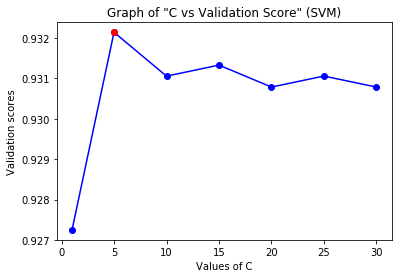

In [12]:
from sklearn.svm import SVC

max_train = 0
max_val = 0
svc_list = [1] + [i for i in range(5, 31, 5)]
optimalC = svc_list[0]
c_vs_validation = [] 
for i in svc_list:
    
    score_train = 0
    score_val = 0
    for train_index, val_index in kf.split(X, y) :
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        clf = SVC(C=i, kernel='rbf', random_state=42)
        clf.fit(X_train, y_train)
        score_train += clf.score(X_train, y_train)
        score_val += clf.score(X_val, y_val)

    score_train /= k
    score_val /= k
    
    print(i, score_train)
    print(i, score_val)
    print('-'*25)
    c_vs_validation.append(score_val)

    if(score_val > max_val) :
        max_val = score_val
        max_train = score_train
        optimalC = i

print("Optimal C = ", optimalC)
print("Training Score by SVM : ", max_train)
print("Validation Score by SVM : ", max_val)
plt.plot(svc_list, c_vs_validation, 'bo-')
plt.plot(optimalC, c_vs_validation[svc_list.index(optimalC)], 'ro')
plt.xlabel("Values of C")
plt.ylabel("Validation scores")
plt.title("Graph of \"C vs Validation Score\" (SVM)")
plt.show()

In [ ]:
max_val = 0
val_list = []
best_clf = None
best_yval = []
y_pred = []

for train_index, val_index in kf.split(X, y) :
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    clf = SVC(C=optimalC, random_state=42)
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    val_score = clf.score(X_val, y_val)
    val_list.append(val_score)
    if(max_val < val_score) :
        max_val = val_score
        best_clf = clf
        best_yval = y_val
        y_pred = best_clf.predict(X_val)

print("Max validation score : ", max_val)
print("val_list : ", sorted(val_list))

test_score = best_clf.score(X_test, y_test)
print("Test Score by SVM : ", test_score)

# Confusion Matrix analysis for SVM

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
display(confusion_matrix(best_yval, y_pred))
display(f1_score(best_yval, y_pred, average='micro'))

 # Applying Random Forest Classifier
Random Forest Classifier generally performs really well but in this case, it is overfitting as we can see that training score and test score have significant difference.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_train = 0
max_val = 0
optimalDepth = 7
optimalEstimator = 5
for depth in [7, 8, 9] :
    for estimator in range(5, 51, 5) :
        score_train = 0
        score_val = 0
        for train_index, val_index in kf.split(X, y) :
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            model_rfc = RandomForestClassifier(n_estimators=estimator, max_depth=depth, random_state=42)
            model_rfc.fit(X_train, y_train)
            score_train += model_rfc.score(X_train, y_train)
            score_val += model_rfc.score(X_val, y_val)
        score_train /= k
        score_val /= k
        print("Training Score for  ", depth, estimator, " : ", score_train)
        print("Validation Score for ", depth, estimator," : ", score_val)
        if(max_val < score_val) :
            max_val = score_val
            max_train = score_train
            optimalDepth = depth
            optimalEstimator = estimator
            print("depth, estimator = ", depth, estimator)
            
print("Optimal Depth = ", optimalDepth)
print("Optimal Number of Estimators = ", optimalEstimator)
print("Training Score by Random Forest Classifier : ", max_train)
print("Validation Score by Random Forest Classifier : ", max_val)

In [8]:
max_val = 0
val_list = []
best_rfc = None
best_yval = []
y_pred = []
for train_index, val_index in kf.split(X, y) :
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    model_rfc = RandomForestClassifier(n_estimators=optimalEstimator, max_depth=optimalDepth, random_state=42)
    model_rfc.fit(X_train, y_train)
    train_score = model_rfc.score(X_train, y_train)
    val_score = model_rfc.score(X_val, y_val)
    val_list.append(val_score)
    if(max_val < val_score) :
        max_val = val_score
        best_rfc = model_rfc
        y_pred = model_rfc.predict(X_val)
        best_yval = y_val
print("Max validation score : ", max_val)
print("val_list : ", sorted(val_list))

test_score = best_rfc.score(X_test, y_test)
print("Test Score by Random Forest Classifier : ", test_score)

Max validation score :  0.9387338325391422
val_list :  [0.902107409925221, 0.903663500678426, 0.9285714285714286, 0.9305177111716622, 0.9387338325391422]
Test Score by Random Forest Classifier :  0.9114353579911775


# Confusion Matrix analysis for Random Forest Classifier

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
display(confusion_matrix(best_yval,y_pred))
display(f1_score(best_yval, y_pred, average='micro'))

array([[238,   3,   4,   0,   0,   0],
       [  2, 202,   8,   0,   2,   0],
       [  5,  40, 152,   0,   0,   0],
       [  0,   0,   0, 246,  11,   0],
       [  0,   0,   0,  15, 260,   0],
       [  0,   0,   0,   0,   0, 281]])

0.9387338325391422

# Challenges faced
- **Model Selection** - How to find the optimal parameters for the model
- **Using PCA** - Should PCA be used or not?
- **Training Time** - Since, the dataset contains 561 attributes and 10299 instances, training the model takes the time.
- **How to split Dataset** - Which technique to use for splitting the data set ? 

# Conclusion
I have trained three models for Human-Activity Classification Dataset and observed their performances. As we can see that out of three, Logistic Regression and SVM are performing really well and Logistic Regression is performing overall better as it has better Validation Score and also better F1-score. Also, from the experience Logistic Regression gives the similar score in Test Dataset as Validation Dataset. So considering Reliability and Performance of Logistic Regression, i will stick with Logistic Regression as my model for predicting the Test Dataset.